In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('lstm.csv')
df.head()

,Unnamed: 0,image-number,x-coord pix,y-coord pix,bbox-width pix,bbox-height pix,tilt-direction pix,x-coord dist,y-coord dist,z-coord dist,tilt-direction dist,timestamp
0,0,1,386.5,274.0,195,122,-1,-12,-11,14,0,1.658866e+09
1,1,2,383.5,273.5,183,119,-1,-12,-11,17,0,1.658866e+09
2,2,3,386.5,267.0,177,128,-1,-11,-11,9,-22,1.658866e+09
3,3,4,398.0,256.5,172,127,-1,-10,-12,10,-25,1.658866e+09
4,4,5,416.5,246.0,169,124,-1,-8,-14,12,-24,1.658866e+09


In [58]:
df = df[['x-coord pix', 'y-coord pix','bbox-width pix', 'bbox-height pix']]
df

,x-coord pix,y-coord pix,bbox-width pix,bbox-height pix
0,386.5,274.0,195,122
1,383.5,273.5,183,119
2,386.5,267.0,177,128
3,398.0,256.5,172,127
4,416.5,246.0,169,124
...,...,...,...,...
1034,399.0,328.5,176,133
1035,407.5,342.0,181,136
1036,425.5,361.5,179,137
1037,439.0,372.0,182,108


<AxesSubplot:>

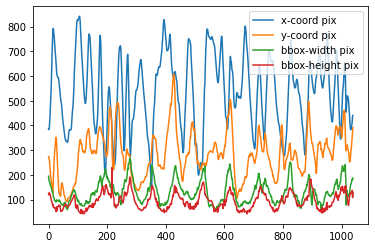

In [59]:
df.plot()

In [60]:
len(df)

1039

In [61]:
dfnp = df.to_numpy()

In [62]:
dfnp[:,(0,2)] /= 960
dfnp[:,(1,3)] /= 720

In [63]:
dfnp

array([[0.40260417, 0.38055556, 0.203125  , 0.16944444],
       [0.39947917, 0.37986111, 0.190625  , 0.16527778],
       [0.40260417, 0.37083333, 0.184375  , 0.17777778],
       ...,
       [0.44322917, 0.50208333, 0.18645833, 0.19027778],
       [0.45729167, 0.51666667, 0.18958333, 0.15      ],
       [0.45885417, 0.54375   , 0.19479167, 0.17916667]])

In [64]:
train = dfnp[:850]
test = dfnp[850:]

In [65]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_inputs = 6
n_features = 4
generator = TimeseriesGenerator(data=train, targets=train, length=n_inputs,batch_size=1)

In [67]:
X, y = generator[0]
X.shape

(1, 6, 4)

In [68]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_inputs, n_features)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
model.summary()

Metal device set to: Apple M1


2022-07-27 12:21:33.774227: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-27 12:21:33.776583: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               42000     
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 42,404
Trainable params: 42,404
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(generator, epochs=50)

Epoch 1/50


2022-07-27 12:22:36.483099: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-27 12:22:38.576610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


844/844 [==============================] - 49s 53ms/step - loss: 0.0050
Epoch 2/50
844/844 [==============================] - 51s 61ms/step - loss: 0.0017
Epoch 3/50
844/844 [==============================] - 47s 55ms/step - loss: 0.0012
Epoch 4/50
844/844 [==============================] - 45s 53ms/step - loss: 7.1670e-04
Epoch 5/50
844/844 [==============================] - 42s 50ms/step - loss: 5.4804e-04
Epoch 6/50
810/844 [===========================>..] - ETA: 1s - loss: 4.2651e-04

In [ ]:
loss_per_ep = model.history.history['loss']
plt.plot(range(len(loss_per_ep)),loss_per_ep)